# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

Reading data

In [27]:
df=pd.read_excel('K3.xlsx')
df.tail()

,G,P
52962,0.406667,0.091648
52963,0.387167,0.083782
52964,0.396667,0.087320
52965,0.189333,0.042822
52966,0.027167,0.006218


plotting relatioship between the variables

Text(0, 0.5, 'power')

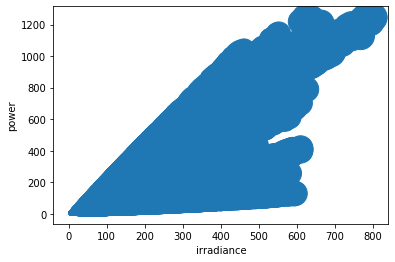

In [28]:
plt.scatter(df.G,df.P,df.T)
plt.xlabel('irradiance',)
plt.ylabel('power')

Creating the cluster

In [29]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

predicting cluster values

In [30]:
y_pred=km.fit_predict(df)
y_pred

array([3, 3, 3, ..., 3, 3, 3])

In [31]:
df['cluster']=y_pred
df.head()

,G,P,cluster
0,0.008667,0.018119,3
1,0.164500,0.369489,3
2,0.717500,1.601420,3
3,0.902167,1.973920,3
4,1.086000,2.448440,3


Plotting the cluster

Text(0, 0.5, 'P')

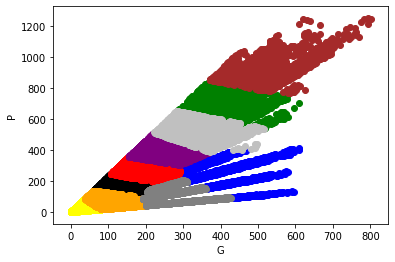

In [37]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

Carrying out Normalisation for more effiecient results

In [38]:
scaler= MinMaxScaler()
scaler.fit(df[['G']])
df[['G']]=scaler.transform(df[['G']])
scaler.fit(df[['P']])
df[['P']]=scaler.transform(df[['P']])
df.head()

,G,P,cluster
0,0.000011,0.000014,3
1,0.000205,0.000295,3
2,0.000896,0.001279,3
3,0.001126,0.001576,3
4,0.001356,0.001955,3


In [39]:
km=KMeans(n_clusters=10)
y_pred=km.fit_predict(df[['G','P']])
y_pred

array([6, 6, 6, ..., 6, 6, 6])

In [40]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

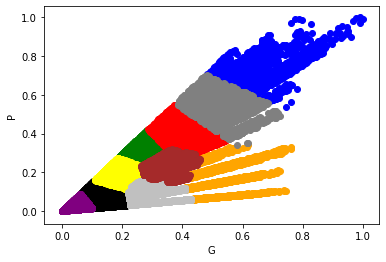

In [41]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.xlabel('G')
plt.ylabel('P')

obtaining the centroids for each cluster

In [42]:
km.cluster_centers_

array([[0.25343431, 0.31430406],
       [0.13685364, 0.0753709 ],
       [0.65889798, 0.72355223],
       [0.18855806, 0.19589609],
       [0.39724578, 0.40514886],
       [0.51159908, 0.15841589],
       [0.02895473, 0.01804829],
       [0.52370576, 0.52797443],
       [0.30442021, 0.08949068],
       [0.34509462, 0.22826804]])

Text(0, 0.5, 'P')

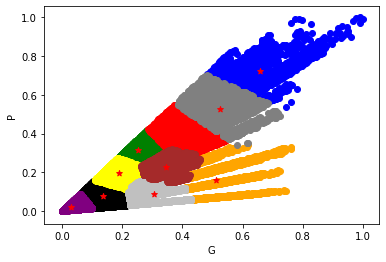

In [43]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]
plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')
plt.scatter(df3.G,df3.P, color='yellow')
plt.scatter(df4.G,df4.P, color='red')
plt.scatter(df5.G,df5.P, color='orange')
plt.scatter(df6.G,df6.P, color='purple')
plt.scatter(df7.G,df7.P, color='grey')
plt.scatter(df8.G,df8.P, color='silver')
plt.scatter(df9.G,df9.P, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [44]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['G','P']])
    sse.append(km.inertia_)

In [45]:
sse

[3216.8677071340853,
 1379.5405532281115,
 797.0324283268212,
 604.3606975246763,
 445.52116462345384,
 344.8362159633352,
 296.0977140038825,
 248.50162887437028,
 219.40381481543923,
 199.49576010915285]

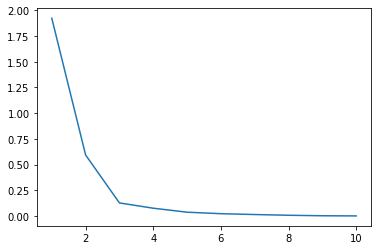

In [24]:
plt.plot(k_range,sse)

Fitting the model with the new K value as 3

In [48]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['G','P']])

In [49]:
df['cluster']=y_pred

Text(0, 0.5, 'P')

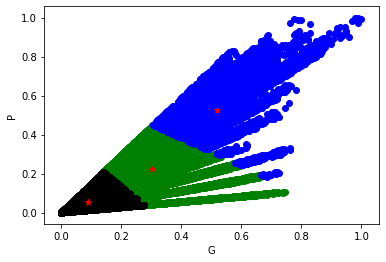

In [50]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

plt.scatter(df0.G,df0.P, color='g')
plt.scatter(df1.G,df1.P, color='black')
plt.scatter(df2.G,df2.P, color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')